In [2]:

#!pip install pyxlsb
#!pip install openpyxl
#!pip install pandas

In [21]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv
import hvplot.pandas
#from config import geoapify_key




In [23]:
df = pd.read_csv("Data_Analyst_Data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [24]:
# Check to see how many rows and columns we have
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 9355
Number of Columns: 12


In [25]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [26]:
# Check to see whether there are duplicates
duplicate_rows = df[df.duplicated()]
# Print the number of duplicates
num_duplicates = duplicate_rows.shape[0]
print("Number of duplicate rows:", num_duplicates)

null_values = df.isnull().sum()
# Check Data to make sure that the data set does not have any Null values
print("Null values count for each column:")
print(null_values)

Number of duplicate rows: 4014
Null values count for each column:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [27]:
# Find the unique count of the specific job titles 
specific_jobs = df["job_title"].value_counts()
specific_jobs

job_title
Data Engineer                               2195
Data Scientist                              1989
Data Analyst                                1388
Machine Learning Engineer                    991
Applied Scientist                            272
Research Scientist                           269
Analytics Engineer                           256
Data Architect                               213
Business Intelligence Engineer               144
Research Engineer                            144
Data Manager                                 132
ML Engineer                                  106
Data Science Manager                          88
Machine Learning Scientist                    76
Business Intelligence Analyst                 54
BI Developer                                  52
Data Science Consultant                       44
Data Specialist                               40
Research Analyst                              39
Decision Scientist                            38
Data Analy

In [28]:
#Get the top 10 job titles
data_df= df['job_title'].value_counts().reset_index()
data_df.columns = ['job_title', 'count']
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,job_title,count
0,Data Engineer,2195
1,Data Scientist,1989
2,Data Analyst,1388
3,Machine Learning Engineer,991
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,256
7,Data Architect,213
8,Business Intelligence Engineer,144
9,Research Engineer,144


In [29]:
#Using the top 10 job titles, find the locations for those job titles. 
data_df = df.groupby(['company_location', 'job_title', 'work_year']).size().reset_index(name='count')
data_df = data_df.sort_values(by='count', ascending=False)
data_df.head(10)

,company_location,job_title,work_year,count
479,United States,Data Engineer,2023,1502
516,United States,Data Scientist,2023,1364
463,United States,Data Analyst,2023,969
559,United States,Machine Learning Engineer,2023,784
478,United States,Data Engineer,2022,410
515,United States,Data Scientist,2022,333
429,United States,Applied Scientist,2023,253
462,United States,Data Analyst,2022,234
591,United States,Research Scientist,2023,233
422,United States,Analytics Engineer,2023,176


In [30]:
#top_10_jobs = data_df.head(10)
#top_10_jobs

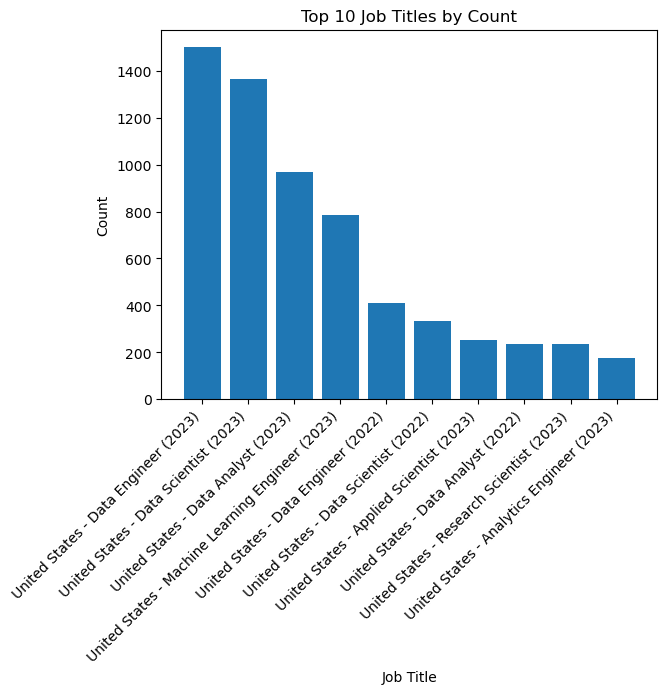

<Figure size 2000x1500 with 0 Axes>

In [31]:

#Plot a bar graph
top_10_jobs = data_df.sort_values(by='count', ascending=False).head(10)

plt.bar(top_10_jobs['company_location'] + ' - ' + top_10_jobs['job_title'] + ' (' + top_10_jobs['work_year'].astype(str) + ')', top_10_jobs['count'])
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles by Count')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(20, 15))
plt.tight_layout()
plt.show()


In [55]:

#List of years
years = [2020, 2021, 2022, 2023]
# Create an empty DataFrame to store the results
mean_salary_by_year = []
for year in years:
    # Filter Dataframe
    df_year = df[df['work_year'] == year]
    mean= pd.DataFrame(columns=['year', 'job_title', 'mean_salary_in_usd'])
    mean = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
    mean= mean_salary_year.sort_values(by='salary_in_usd')
    top_10_jobs_year = mean_salary_year.head(10)
    # Add the year column
    top_10_jobs_year['work_year'] = year
# Append the results to the mean_salary_by_year DataFrame
    #mean_salary_by_year = mean_salary_by_year.append(top_10_jobs_year, ignore_index=True)
    print(mean_salary_by_year)


#top_10_jobs = data_df.head(10)

#years = [2020, 2021, 2022, 2023]
#mean_salary_by_year = pd.DataFrame(columns=['year', 'job_title', 'mean_salary'])
#for y in years:
#    df_year = df[df['work_year'] == y]
#    mean_salary_year = df_year.groupby('job_title')['salary_in_usd'].mean().reset_index()
 #   mean = mean_salary_year.head(10)
  #  print(f"For the year {y}, the mean salary is {mean}")
    

#mean_salary_year = pd.Dataframe(colum)

/var/folders/rp/8lsdkk916jq55y5zy1jgqcdw0000gn/T/ipykernel_81358/3376058724.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_jobs_year['work_year'] = year


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid